<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 7. <b>Регрессия и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Линейная регрессия</a></li>
        <li><a href="#2">Метод k ближайших соседей</a>
        <li><a href="#3">Полиномиальная регрессия</a>
        <li><a href="#4">Байесовская регрессия</a>
        <li><a href="#5">Источники</a>
        </li>
    </ol>
</div>

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Линейная регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
n = 100
x = stats.uniform.rvs(size=n, loc=4, scale=8) #равномерное распределение uniform
x[:5]

array([ 10.36718179,  10.57980497,   4.64650648,  11.52842369,   6.98691762])

In [9]:
y = 2 + 0.3*x
y[:5]

array([ 5.11015454,  5.17394149,  3.39395194,  5.45852711,  4.09607529])

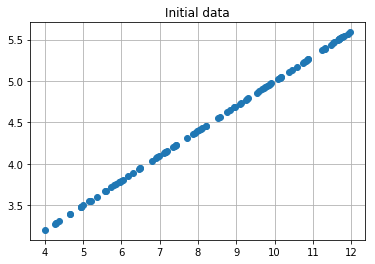

In [10]:
plt.title("Initial data")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

In [11]:
mu = 0 #добавление разброса
sigma = 0.5
y1 = stats.norm.rvs(size=n, loc=mu, scale=sigma) + y
y1[:5]

array([ 4.50949967,  5.88144102,  2.94780735,  5.53700539,  4.48951668])

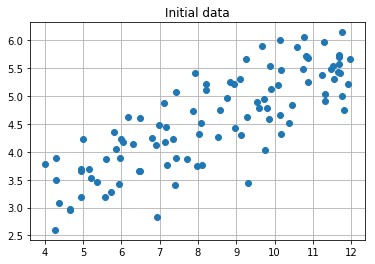

In [12]:
plt.title("Initial data")
plt.plot(x, y1, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [13]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

In [14]:
x_train = np.array([x[:tr_n]]).T
x_test = np.array([x[tr_n:]]).T

In [15]:
x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

In [16]:
y_train = y[:tr_n]
y_test = y[tr_n:]

In [17]:
y1_train = y1[:tr_n]
y1_test = y1[tr_n:]

In [18]:
len(x_train)+len(y_train)

140

<p><b>Обучение</b></p>

In [19]:
linRegModel_y = LinearRegression()
linRegModel_y1 = LinearRegression()

In [20]:
#Модель для y
lrModelTr_y = linRegModel_y.fit(x_train, y_train) #метод fit для обучения
lrModelTr_y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print("Коэффициенты (наклон): ", lrModelTr_y.coef_)
print("Пересечение: ", lrModelTr_y.intercept_)

Коэффициенты (наклон):  [ 0.3]
Пересечение:  2.0


In [22]:
lrModelTr_y1 = linRegModel_y1.fit(x_train, y1_train)
lrModelTr_y1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print("Коэффициенты (наклон): ", lrModelTr_y1.coef_)
print("Пересечение: ", lrModelTr_y1.intercept_)

Коэффициенты (наклон):  [ 0.2875097]
Пересечение:  2.1279132163


In [24]:
f_x = lambda x : x * lrModelTr_y.coef_ + lrModelTr_y.intercept_
f_x_1 = lambda x : x * lrModelTr_y1.coef_ + lrModelTr_y1.intercept_

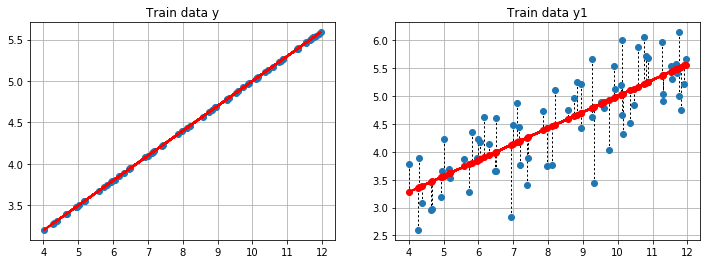

In [25]:
xx = np.linspace(0,5,100)

plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data y")
plt.plot(x_train, y_train, "o")
plt.plot(x_train, f_x(x_train),color="red", lw=2)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Train data y1")
plt.plot(x_train, y1_train, "o")
plt.plot(x_train, f_x_1(x_train), "o-", color="red", lw=2)
plt.vlines(x_train, ymin=y1_train, ymax=f_x_1(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

<p><b>Проверка на тестовом подмножестве</b></p>

In [26]:
y_lr_test = linRegModel_y.predict(x_test)
y1_lr_test = linRegModel_y1.predict(x_test)

In [27]:
tss_y = ((y_test - y_test.mean())**2).sum()
tss_y1 = ((y1_test - y1_test.mean())**2).sum()

In [28]:
rss_y = ((y_lr_test - y_test)**2).sum()
rss_y1 = ((y1_lr_test - y1_test)**2).sum()

In [29]:
print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 11.6946690592
Остаточная сумма квадратов (RSS): 1.55800028781e-29
Коэффициент детерминации (R^2): 1.0


In [30]:
print("Модель для y1")
print("Сумма квадратов (TSS):", tss_y1)
print("Остаточная сумма квадратов (RSS):", rss_y1)
print("Коэффициент детерминации (R^2):", 1 - rss_y1/tss_y1)

Модель для y1
Сумма квадратов (TSS): 18.6957617964
Остаточная сумма квадратов (RSS): 5.41266131153
Коэффициент детерминации (R^2): 0.710487255321


In [31]:
linRegModel_y.score(x_test, y_test) #считает коэффициент детерминации

1.0

In [32]:
linRegModel_y.score(x_test, y1_test)

0.70647547210106498

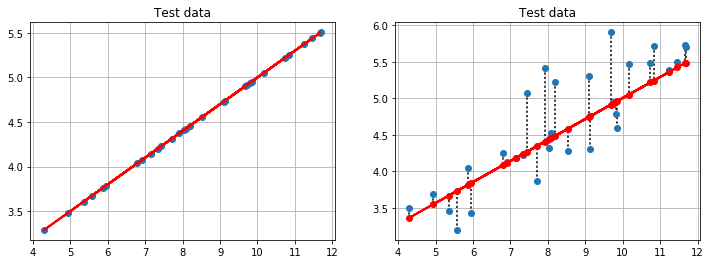

In [33]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(x_test, f_x(x_test), color="red", lw=2)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y1_test, "o")
plt.plot(x_test, f_x_1(x_test), "o-", color="red", lw=2)
plt.vlines(x_test, ymin=y1_test, ymax=y1_lr_test, colors="black", linestyles="dotted")
plt.grid(True)

plt.show()

<p><b>Графики</b></p>

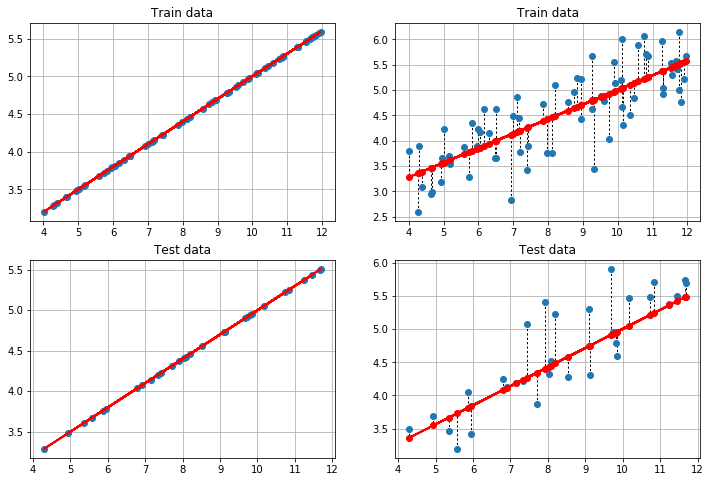

In [34]:
plt.figure(1, figsize=[12, 8])

plt.subplot(2,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(x_train, f_x(x_train),color="red", lw=2)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Train data")
plt.plot(x_train, y1_train, "o")
plt.plot(x_train, f_x_1(x_train), "o-", color="red", lw=2)
plt.vlines(x_train, ymin=y1_train, ymax=f_x_1(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(x_test, f_x(x_test), color="red", lw=2)
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Test data")
plt.plot(x_test, y1_test, "o")
plt.plot(x_test, f_x_1(x_test), "o-", color="red", lw=2)
plt.vlines(x_test, ymin=y1_test, ymax=f_x_1(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Метод k ближайших соседей</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5)
y = stats.norm.rvs(size=n, loc=0, scale=0.2) + np.sin(x)

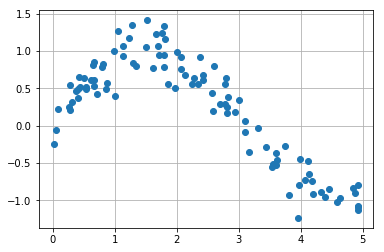

In [37]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [38]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

y_train = y[:tr_n]
y_test = y[tr_n:]

<p><b>Обучение</b></p>

In [39]:
knnModel = {}
for k in [2, 5, 15]:
    model =  KNeighborsRegressor(n_neighbors=k, weights="uniform", algorithm="auto", 
                                 metric="minkowski", p=2, n_jobs=1)
    knnModel[k] = model.fit(x_train, y_train)

In [40]:
y_train_pred_2 = knnModel[2].predict(x_train)
y_train_pred_5 = knnModel[5].predict(x_train)
y_train_pred_15 = knnModel[15].predict(x_train)

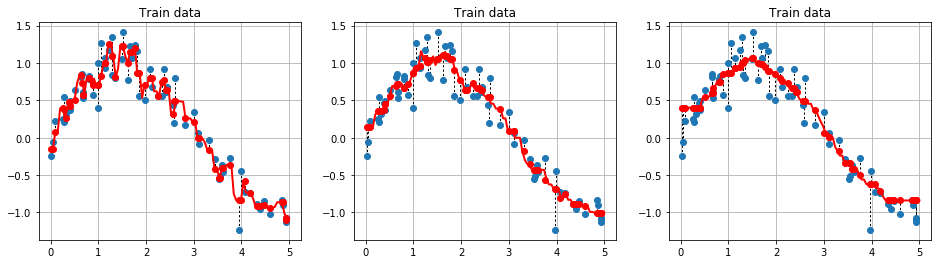

In [41]:
xx = np.linspace(0,5,100)
knnR_2 = knnModel[2]
knnR_5 = knnModel[5]
knnR_15 = knnModel[15]
plt.figure("knn-train", figsize=[16,4])

plt.subplot(1,3,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_2.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_2, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,3,2)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_5.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_5, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,3,3)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_15.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_15, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [42]:
y_pr_test_2 = knnModel[2].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_2 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 12.8837247932
Остаточная сумма квадратов (RSS): 1.18182292887
Коэффициент детерминации (R^2): 0.908270088981


In [43]:
y_pr_test_5 = knnModel[5].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_5 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 12.8837247932
Остаточная сумма квадратов (RSS): 1.10910558229
Коэффициент детерминации (R^2): 0.913914213468


In [44]:
y_pr_test_15 = knnModel[15].predict(x_test)

tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test_15 - y_test)**2).sum()

print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 12.8837247932
Остаточная сумма квадратов (RSS): 0.985165124708
Коэффициент детерминации (R^2): 0.923534137796


<p><b>Графики</b></p>

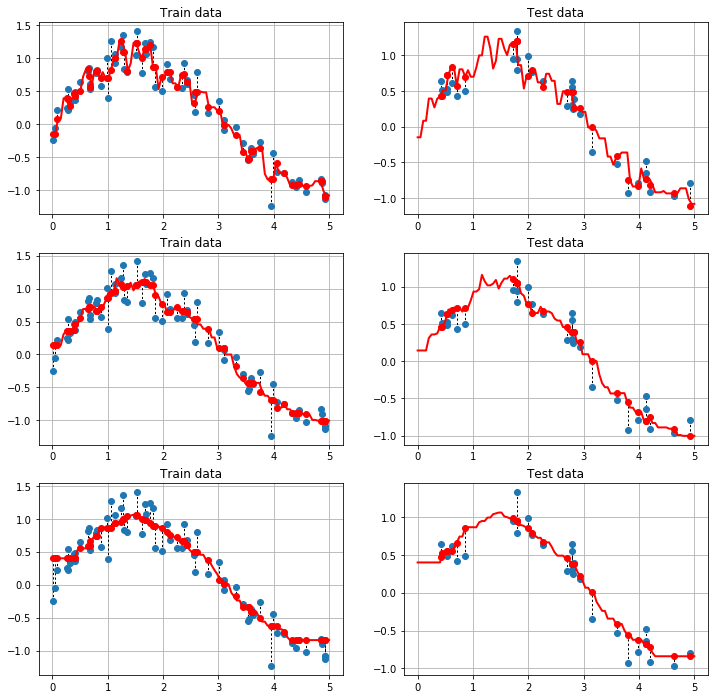

In [45]:
plt.figure(1, figsize=[12, 12])

plt.subplot(3,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_2.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_2, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnR_2.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_2, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_2, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,3)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_5.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_5, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,4)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnR_5.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_5, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_5, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,5)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, knnR_15.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_train, y_train_pred_15, "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=y_train_pred_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(3,2,6)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, knnR_15.predict(xx.reshape(len(xx),1)), color="red", lw=2)
plt.plot(x_test, y_pr_test_15, "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=y_pr_test_15, colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Полиномиальная регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from numpy.polynomial.polynomial import polyval

In [47]:
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=5)
y = stats.norm.rvs(size=n, loc=0, scale=0.2) + np.sin(x)

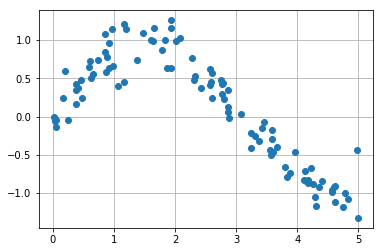

In [48]:
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p><b>Формирование обучающего и тестового подмножеств</b></p>

In [49]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

In [50]:
x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

In [51]:
y_train = y[:tr_n]
y_test = y[tr_n:]

<p><b>Обучение</b></p>

In [52]:
pf = PolynomialFeatures(degree=3)
pf_tfrd = pf.fit_transform(x_train, y_train)
pf_tfrd

array([[  1.00000000e+00,   3.82452857e+00,   1.46270188e+01,
          5.59414511e+01],
       [  1.00000000e+00,   4.56187820e+00,   2.08107327e+01,
          9.49360279e+01],
       [  1.00000000e+00,   2.42915659e+00,   5.90080173e+00,
          1.43339714e+01],
       [  1.00000000e+00,   2.78564615e+00,   7.75982448e+00,
          2.16161252e+01],
       [  1.00000000e+00,   1.94045548e+00,   3.76536747e+00,
          7.30652794e+00],
       [  1.00000000e+00,   7.29677174e-01,   5.32428778e-01,
          3.88501127e-01],
       [  1.00000000e+00,   2.60497252e+00,   6.78588185e+00,
          1.76770358e+01],
       [  1.00000000e+00,   5.89964809e-01,   3.48058476e-01,
          2.05342252e-01],
       [  1.00000000e+00,   2.32643888e+00,   5.41231785e+00,
          1.25914267e+01],
       [  1.00000000e+00,   4.74926393e+00,   2.25555078e+01,
          1.07122060e+02],
       [  1.00000000e+00,   2.86743824e+00,   8.22220207e+00,
          2.35766566e+01],
       [  1.00000000e

In [53]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(pf_tfrd, y_train)

In [54]:
print("Коэффициенты: ", lr.coef_)
print("Пересечение: ", lr.intercept_)

Коэффициенты:  [ 0.          1.71478988 -0.77796601  0.07884832]
Пересечение:  -0.169290354504


<p>или можно использовать Pipeline</p>

In [55]:
plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", LinearRegression(fit_intercept=True))])

In [56]:
plModelTr_PL = plModelTr_PL.fit(x_train, y_train)

In [57]:
print("Коэффициенты: ", plModelTr_PL.named_steps["lr"].coef_)
print("Пересечение: ", plModelTr_PL.named_steps["lr"].intercept_)

Коэффициенты:  [ 0.          1.71478988 -0.77796601  0.07884832]
Пересечение:  -0.169290354504


In [58]:
f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_

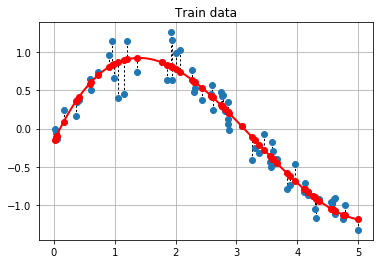

In [59]:
xx = np.linspace(0,5,100)

plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)
plt.show()

<p><b>Проверка на тестовом подмножестве</b></p>

In [60]:
y_pr_test = plModelTr_PL.predict(x_test)

In [61]:
tss_y = ((y_test - y_test.mean())**2).sum()
rss_y = ((y_pr_test - y_test)**2).sum()

In [62]:
print("Модель для y")
print("Сумма квадратов (TSS):", tss_y)
print("Остаточная сумма квадратов (RSS):", rss_y)
print("Коэффициент детерминации (R^2):", 1 - rss_y/tss_y)

Модель для y
Сумма квадратов (TSS): 13.1826762537
Остаточная сумма квадратов (RSS): 1.47687847338
Коэффициент детерминации (R^2): 0.887968236119


In [63]:
plModelTr_PL.score(x_test, y_test)

0.88796823611878151

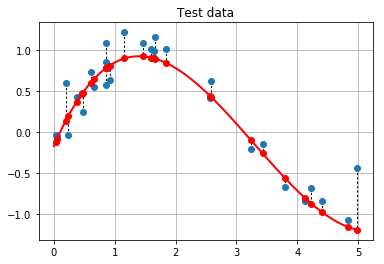

In [64]:
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)
plt.show()

<p><b>Графики</b></p>

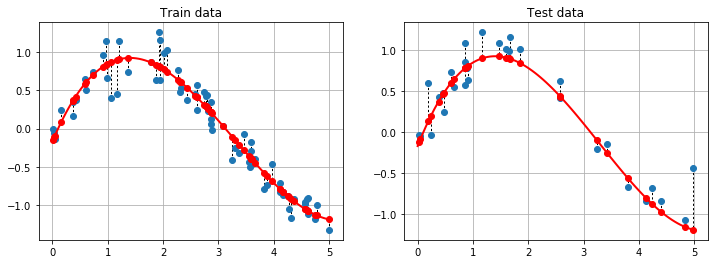

In [65]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.plot(x_train, y_train, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_train, f_x(x_train), "o", color="red", lw=2)
plt.vlines(x_train, ymin=y_train, ymax=f_x(x_train), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.plot(x_test, y_test, "o")
plt.plot(xx, f_x(xx), color="red", lw=2)
plt.plot(x_test, f_x(x_test), "o", color="red", lw=2)
plt.vlines(x_test, ymin=y_test, ymax=f_x(x_test), colors="black", linestyles="dotted", lw=1)
plt.grid(True)

plt.show()

In [66]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, c1, c2, c3, c4):
    return c1+c2*x+c3*x**2+c4*x**3

In [67]:
popt, pcov = curve_fit(func, x_train.T.ravel(), y_train)
popt

array([-0.16929042,  1.71478997, -0.77796604,  0.07884832])

In [68]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [69]:
linear_regression = LinearRegression()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Байесовская регрессия</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [70]:
from sklearn.linear_model import BayesianRidge

In [71]:
import numpy as np

In [72]:
tr_pr = 0.7
tr_n = int(np.round(tr_pr*n))

x_train = x[:tr_n, np.newaxis]
x_test = x[tr_n:, np.newaxis]

y_train = y[:tr_n]
y_test = y[tr_n:]

In [73]:
bayesRegModelTr_y = BayesianRidge(n_iter=300, tol=1e-3, alpha_1=1e-6,  alpha_2=1e-6, lambda_1=1e-6, 
                                  lambda_2=1e-6, fit_intercept=True, normalize=False)

In [74]:
brModelTr_y = bayesRegModelTr_y.fit(x_train, y_train)
brModelTr_y

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [75]:
print("Коэффициенты (наклон): ", brModelTr_y.coef_)
print("Пересечение: ", brModelTr_y.intercept_)
print("Параметры гамма-распределения:")
print("alpha = ", brModelTr_y.alpha_)
print("lambda = ", brModelTr_y.lambda_)

Коэффициенты (наклон):  [-0.37660664]
Пересечение:  1.00763081557
Параметры гамма-распределения:
alpha =  5.03104929827
lambda =  6.98172411279


In [76]:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

SyntaxError: invalid syntax (<ipython-input-76-97fd8bff3926>, line 1)